In [2]:
from random import random, choices, randrange, choice
from collections import defaultdict
import matplotlib.pyplot as plt
from time import time
from glob import glob
import igraph as ig

In [4]:
WS_small = {}
paths = [0.1, 0.75, 0.5]
for path in glob("BA/small*"):  
    print(path)
    values = []
    with open(path, "r") as f:
        for line in f:
            values.append(float(line.rstrip().split()[1]))
    label = paths.pop()
    print(label)
    WS_small[label] = values
    

BA/smallBA_0.500000.txt
0.5
BA/smallBA_0.750000.txt
0.75
BA/smallBA_0.100000.txt
0.1


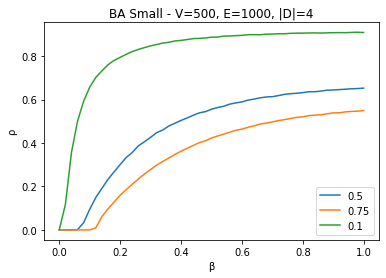

In [5]:

x = [i/50 for i in range(len(WS_small[0.5]))]
for k, v in WS_small.items():
    plt.plot(x, v, label=k)
plt.title("BA Small - V=500, E=1000, |D|=4")
plt.xlabel('β')
plt.ylabel('ρ')
plt.legend()
plt.show()

In [8]:
WS_medium = {}
paths = [0.5, 0.75, 0.1]
for path in glob("BA/medium*"):  
    print(path)
    values = []
    with open(path, "r") as f:
        for line in f:
            values.append(float(line.rstrip().split()[1]))
    label = paths.pop()
    print(label)
    WS_medium[label] = values
    

BA/mediumBA_0.100000.txt
0.1
BA/mediumBA_0.750000.txt
0.75
BA/mediumBA_0.500000.txt
0.5


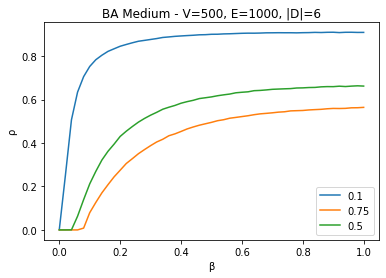

In [9]:
x = [i/50 for i in range(len(WS_medium[0.5]))]
for k, v in WS_medium.items():
    plt.plot(x, v, label=k)
plt.title("BA Medium - V=500, E=1000, |D|=6")
plt.xlabel('β')
plt.ylabel('ρ')
plt.legend()
plt.show()

In [11]:
WS_big = {}
paths = [0.1, 0.5, 0.75]
for path in glob("BA/big*"):  
    print(path)
    values = []
    with open(path, "r") as f:
        for line in f:
            values.append(float(line.rstrip().split()[1]))
    label = paths.pop()
    print(label)
    WS_big[label] = values

BA/bigBA_0.750000.txt
0.75
BA/bigBA_0.500000.txt
0.5
BA/bigBA_0.100000.txt
0.1


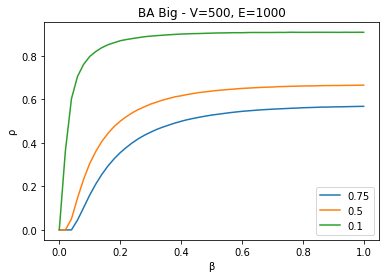

In [12]:
x = [i/50 for i in range(len(WS_big[0.5]))]
for k, v in WS_big.items():
    plt.plot(x, v, label=k)
plt.title("BA Big - V=500, E=1000")
plt.xlabel('β')
plt.ylabel('ρ')
plt.legend()
plt.show()

In [ ]:
small = {}
for path in glob("small/*0.750000.txt"):    
    values = []
    with open(path, "r") as f:
        for line in f:
            values.append(float(line.rstrip().split()[1]))
    small[path[11:path.find("_")]] = values

In [ ]:
x = [i/50 for i in range(len(small["BA"]))]
for k, v in small.items():
    plt.plot(x, v, label=k)
plt.title("Small - V=500, E=1000, |D|=4")
plt.xlabel('β')
plt.ylabel('ρ')
plt.legend()
plt.show()

In [ ]:
medium = {}
for path in glob("medium/*0.750000.txt"):    
    values = []
    with open(path, "r") as f:
        for line in f:
            values.append(float(line.rstrip().split()[1]))
    medium[path[13:path.find("_")]] = values

In [ ]:
x = [i/50 for i in range(len(medium["BA"]))]
for k, v in medium.items():
    plt.plot(x, v, label=k)
plt.title("Medium - V=500, E=1500, |D|=6")
plt.xlabel('β')
plt.ylabel('ρ')
plt.legend()
plt.show()

In [ ]:
big = {}
for path in glob("big/*0.750000.txt"):    
    values = []
    with open(path, "r") as f:
        for line in f:
            values.append(float(line.rstrip().split()[1]))
    big[path[7:path.find("_")]] = values

In [ ]:
x = [i/50 for i in range(len(big["BA"]))]
for k, v in big.items():
    plt.plot(x, v, label=k)
plt.title("Big - V=3618, E=14142")
plt.xlabel('β')
plt.ylabel('ρ')
plt.legend()
plt.show()

In [ ]:
def mmca(a, b):
    infected_old = infected_original[:]
    for _ in range(10000):
        infected_new = []
        for i, state in enumerate(infected_old):
            if state:
                new_state = 1-a
            else:
                q = 1
                for neighbor in neighbors[i]:
                    q *= 1 - b*infected_old[neighbor]
                new_state = 1-q
            infected_new.append(new_state)
        first = infected_new[0]
        if all(first == x for x in infected_new):
            print(a, b, first)
            break
        infected_old = infected_new
    else:
        print(a, b, "Error")

In [ ]:
x = [i/50 for i in range(len(small["BA"]))]
for k in small.keys():
    plt.plot(x, small[k], label='small')
    plt.plot(x, medium[k], label='medium')
    plt.plot(x, big[k], label='big')
    #mmca_res = [mmca(0.5, i) for i in x]
    #plt.plot(x, mmca_res, label='mmca_res')
    plt.title(k)
    plt.xlabel('β')
    plt.ylabel('ρ')
    plt.legend()
    plt.show()